In [1]:
import os
import sys
# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../scripts"))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data_loader import load_data
from data_cleaner import clean_data
from eda_utils import summarize_data,count_unique_values
from visualization import plot_distribution ,plot_correlation_matrix, plot_timeseries,plot_categorical_distribution

In [3]:
# Load datasets
train_data = pd.read_csv(r'D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\data\raw\train.csv') 
test_data = pd.read_csv(r'D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\data\raw\test.csv') 
store_data = pd.read_csv(r'D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\data\raw\store.csv') 
#display the first 5 rows of the train data
train_data.head()



C:\Users\Yoni\AppData\Local\Temp\ipykernel_54824\4019552533.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r'D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\data\raw\train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# Define file paths for cleaned data 
train_cleaned_path = r'D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\data\processed\train_cleaned.csv' 
test_cleaned_path = r'D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\data\processed\processedtest_cleaned.csv' 
store_cleaned_path = r'D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\data\processed\processedstore_cleaned.csv' 


In [7]:
# Clean each dataset and save
train_data_cleaned = clean_data(train_data, data_type="train", save_path=train_cleaned_path) 
test_data_cleaned = clean_data(test_data, data_type="test", save_path=test_cleaned_path) 
store_data_cleaned = clean_data(store_data, data_type="store", save_path=store_cleaned_path)

In [8]:
# Display basic info for Train Data
print("Train Data Info:")
train_data_cleaned.info()
print("\nTrain Data Description:")
train_data_cleaned.describe()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 69.8 MB

Train Data Description:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01


In [9]:
# Display basic info for test Data
print("Test Data Info:")
test_data_cleaned.info()
print("\nTest Data Description:")
test_data_cleaned.describe()

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41088 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  int64         
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 2.5 MB

Test Data Description:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41088,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,2015-08-24 12:00:00,0.854361,0.395833,0.004381,0.443487
min,1.000000,1.000000,1.000000,2015-08-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,2015-08-12 18:00:00,1.000000,0.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,2015-08-24 12:00:00,1.000000,0.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,2015-09-05 06:00:00,1.000000,1.000000,0.000000,1.000000
max,41088.000000,1115.000000,7.000000,2015-09-17 00:00:00,1.000000,1.000000,1.000000,1.000000
std,11861.228267,320.274496,2.015481,NaN,0.352748,0.489035,0.066044,0.496802


In [10]:
# Display basic info for store Data
print("Store Data Info:")
store_data_cleaned.info()
print("\nStore Data Description:")
store_data_cleaned.describe()

Store Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB

Store Data Description:


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1.115000e+03,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,-3.186290e-18,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,1.000449e+00,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,-7.027262e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,-6.112358e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,-4.014615e-01,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,1.932257e-01,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,9.209599e+00,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [11]:
# Define the path where all plots will be saved
output_path = r"D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\plots"

Plot saved at D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\plots\sales_dist.png


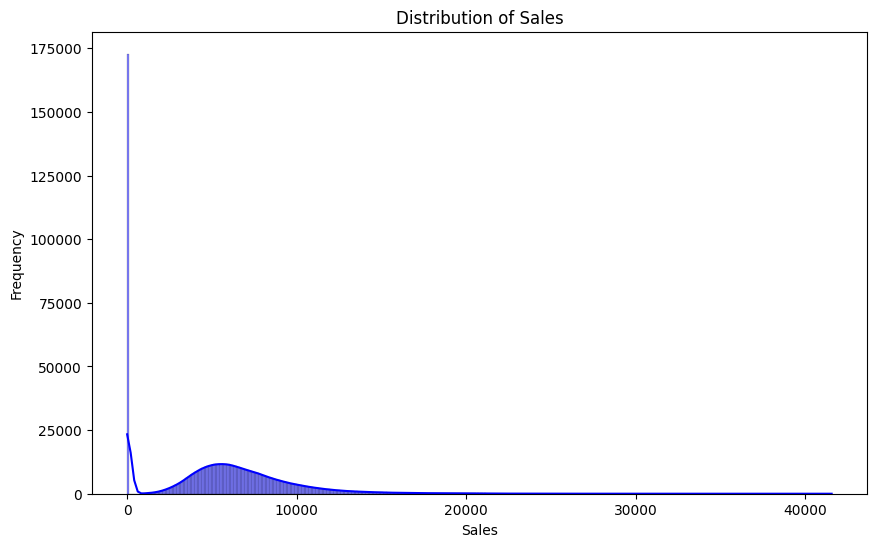

Plot saved at D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\plots\customers_dist.png


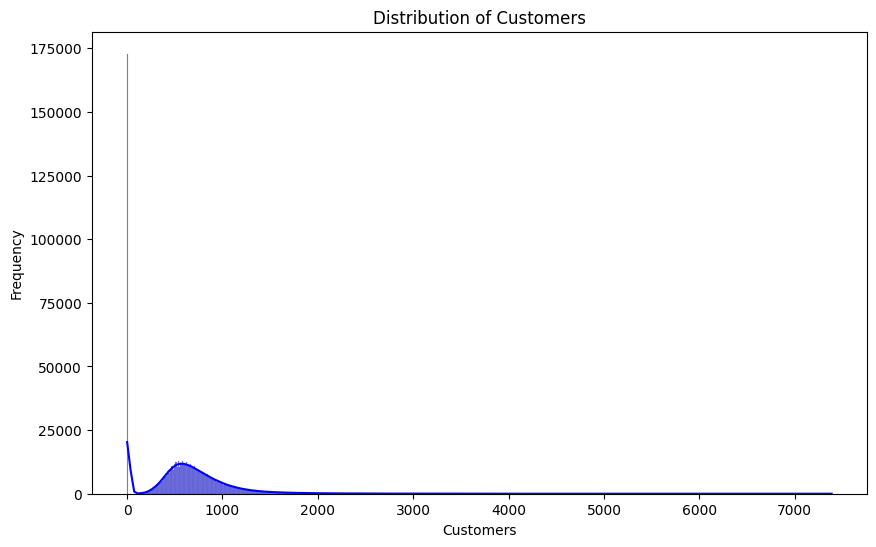

In [12]:
# Plot histogram for numerical features like 'Sales' and 'Customers'
plot_distribution(train_data, column='Sales', output_path=f"{output_path}\\sales_dist.png")
plot_distribution(train_data, column='Customers', output_path=f"{output_path}\\customers_dist.png")


Plot saved at D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\plots\sales_timeseries.png


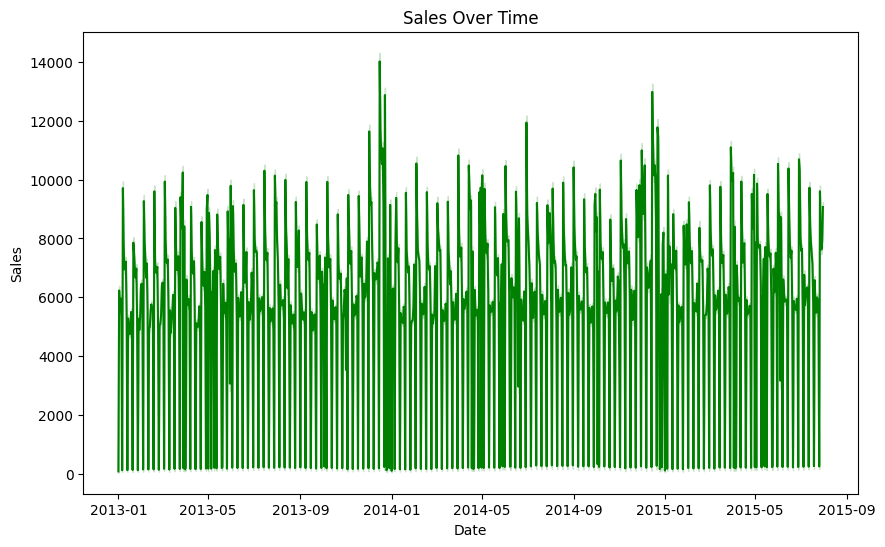

In [13]:
#  Plot time-series for Sales
plot_timeseries(train_data, date_column='Date', value_column='Sales', title="Sales Over Time", output_path=f"{output_path}\\sales_timeseries.png")

d:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\scripts\visualization.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[column], palette="Set2")


Plot saved at D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\plots\stateholiday_dist.png


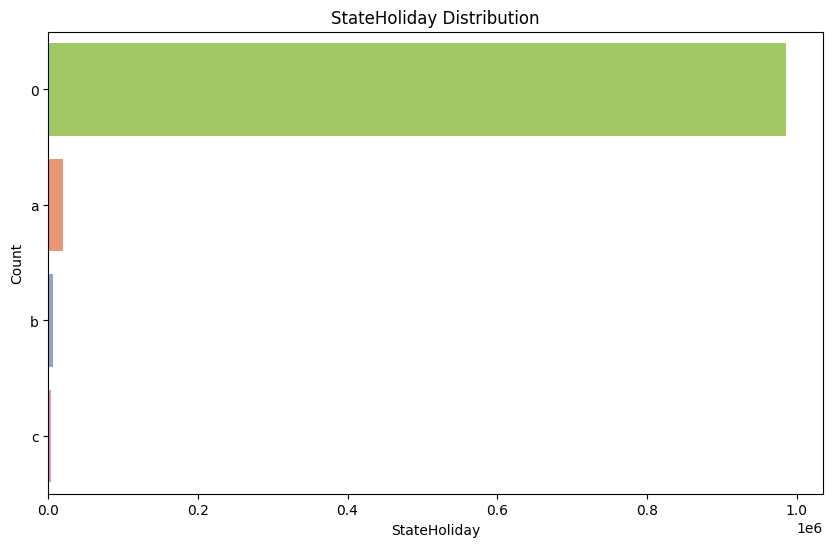

In [14]:
# Plot distribution of StateHoliday
plot_categorical_distribution(train_data, column='StateHoliday', title="StateHoliday Distribution", output_path=f"{output_path}\\stateholiday_dist.png")

Correlation matrix saved at D:\Kifya_training\Week 4\Rossmann-Pharmaceuticals-Sales-Forecasting\plots\correlation_matrix.png


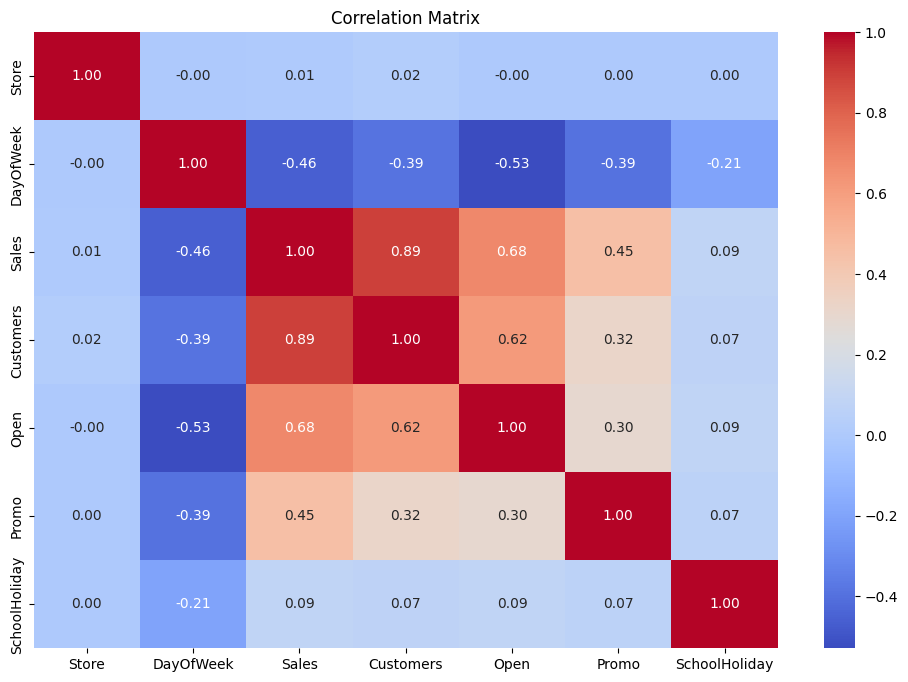

In [15]:
#Plot correlation matrix
plot_correlation_matrix(train_data, output_path=f"{output_path}\\correlation_matrix.png")